<a href="https://colab.research.google.com/github/GustavoLLima/treinamento-h2ia/blob/main/Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)
#!ls

Mounted at /content/drive/
drive  sample_data


In [84]:
import pandas as pd

#!pip install gdown
!gdown https://drive.google.com/uc?id=1nce33_Z3nfBoXW6467B21Yn3eWjO0s_j

dataset = pd.read_csv("2agaricus-lepiota.data")
dataset

Downloading...
From: https://drive.google.com/uc?id=1nce33_Z3nfBoXW6467B21Yn3eWjO0s_j
To: /content/2agaricus-lepiota.data
100% 374k/374k [00:00<00:00, 34.2MB/s]


,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
#import pandas as pd

# dataset = pd.read_csv("drive/My Drive/mushroom_dataset/agaricus-lepiota.data", header=None)
#dataset = pd.read_csv("drive/My Drive/mushroom_dataset/2agaricus-lepiota.data")
#dataset

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# le = LabelEncoder()
# le.fit(["paris", "paris", "tokyo", "amsterdam"])
# list(le.classes_)
# le.transform(["tokyo", "tokyo", "paris"])
# list(le.inverse_transform([2, 2, 1]))

dataset = dataset.apply(LabelEncoder().fit_transform)
#OneHotEncoder().fit_transform(dataset)

dataset

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# X = dataset.copy()
# X = X.drop(0, axis=1)
# features = X.iloc()

# scaler = MinMaxScaler(feature_range=(0,1))
# features = scaler.fit_transform(features)

# X = features

# y = dataset[0].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [125]:
from sklearn.model_selection import train_test_split
#X = dataset.copy()
#X = X.iloc[: , 1:]

X = dataset.drop(columns=['target'])[['odor']]
y = dataset['target']

#y = dataset[0].values
#y = dataset[0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [126]:
X

,odor
0,6
1,0
2,3
3,6
4,5
...,...
8119,5
8120,5
8121,5
8122,8


In [127]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [128]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [98]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-bewlow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6128,5,2,2,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
6633,5,2,4,0,7,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,0
4839,2,3,9,0,2,1,0,0,7,0,...,1,4,0,0,2,1,2,1,4,4
5473,5,3,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
4100,5,3,2,0,8,1,0,1,0,1,...,2,6,6,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2,0,9,0,2,1,0,0,7,0,...,1,4,0,0,2,1,2,1,4,0
5178,5,3,1,0,5,1,1,1,10,0,...,0,7,4,0,2,1,0,7,4,2
5334,2,2,3,1,2,1,0,0,3,1,...,0,7,7,0,2,1,4,1,4,5
779,0,3,8,1,3,1,0,0,10,0,...,2,7,7,0,2,1,4,3,2,3


In [129]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [130]:
clf.predict_proba(X_test)

array([[0.96510638, 0.03489362],
       [0.96510638, 0.03489362],
       [0.96510638, 0.03489362],
       ...,
       [0.        , 1.        ],
       [0.96510638, 0.03489362],
       [0.        , 1.        ]])

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9858261842596047

In [133]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[1389,    0],
       [  38, 1254]])

In [134]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

1.0

In [135]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.9705882352941176

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['p','e']))

              precision    recall  f1-score   support

           p       0.97      1.00      0.99      1389
           e       1.00      0.97      0.99      1292

    accuracy                           0.99      2681
   macro avg       0.99      0.99      0.99      2681
weighted avg       0.99      0.99      0.99      2681



In [137]:
feature_names = X.columns
feature_names

Index(['odor'], dtype='object')

In [138]:
#clf.feature_importances_
clf.feature_names_in_

array(['odor'], dtype=object)

In [139]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = clf.feature_names_in_)

In [140]:
feature_importance

,0
odor,1.0


In [141]:
features = list(feature_importance[feature_importance[0]>=0].index)
features

['odor']

<Axes: >

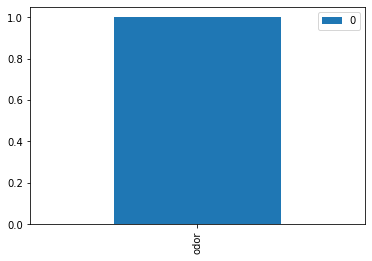

In [142]:
feature_importance.head(22).plot(kind='bar')

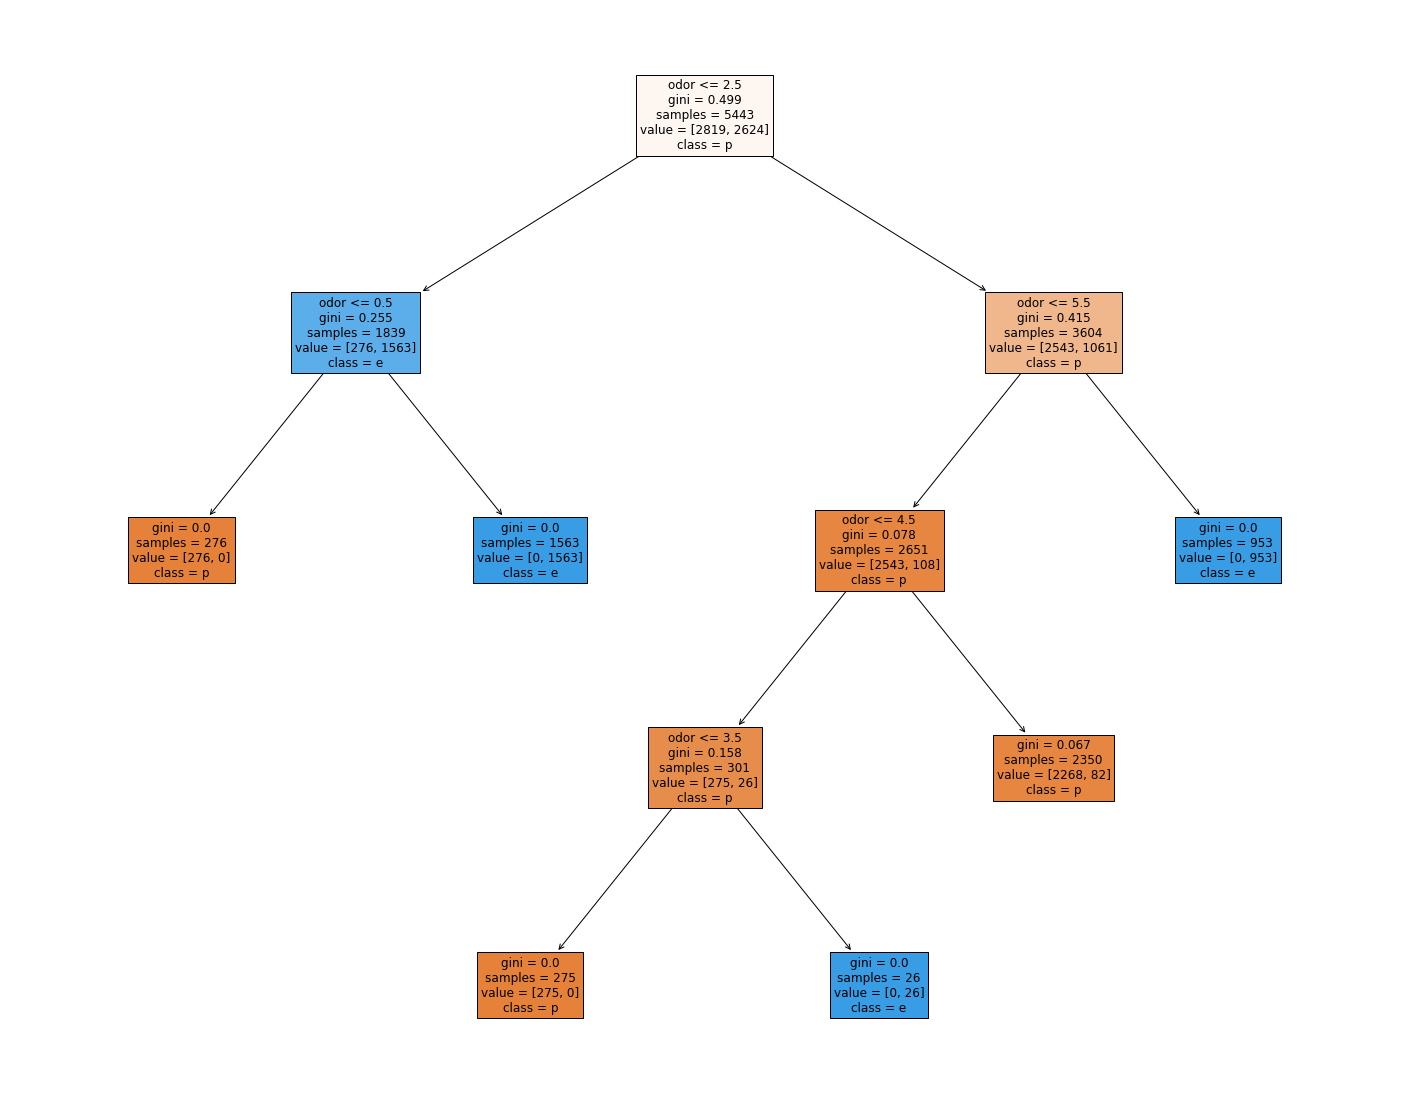

In [143]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names = feature_names, class_names={0:'p', 1:'e'}, filled=True,fontsize=12)